In [2]:
import time
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
PATH = r'D:\Proyectos\Hands\HigieneManos' # PATH TO THE LOCAL PROJECT FOLDER

# Data From APP

In [3]:
conn = sqlite3.connect(PATH + r'\app\DataBase\HandHygiene_database.db')

In [4]:
df = pd.read_sql_query("SELECT * FROM my_table", conn)
conn.close()

In [5]:
df['Total_time']=df[['Step_1', 'Step_2_1', 'Step_2_2', 'Step_3',
       'Step_4_1', 'Step_4_2', 'Step_5_1', 'Step_5_2', 'Step_6_1', 'Step_6_2']].sum(axis=1)

In [6]:
df.head()

,id,date_time,Step_1,Step_2_1,Step_2_2,Step_3,Step_4_1,Step_4_2,Step_5_1,Step_5_2,Step_6_1,Step_6_2,No_Step,Total_time
0,1,2024-10-17 20:59:51.401250,5.298500,0.617185,1.410743,3.619626,3.319678,5.581381,5.118662,8.989363,5.125623,2.368496,7.007350,41.449257
1,2,2024-10-17 21:03:55.351376,3.571851,1.845400,1.515444,3.279030,1.061536,4.838037,1.397272,8.026449,2.370028,2.489386,2.788624,30.394432
2,3,2024-10-18 08:02:14.233619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,2024-10-18 08:02:22.978528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,2024-10-18 08:02:41.328037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Data times manual capture

In [7]:
df_manual = pd.read_excel(PATH + r'\DataVerification.xlsx')
df_manual['Total_time']=df_manual[['Step_1', 'Step_2_1', 'Step_2_2', 'Step_3',
       'Step_4_1', 'Step_4_2', 'Step_5_1', 'Step_5_2', 'Step_6_1', 'Step_6_2']].sum(axis=1)

In [8]:
df_manual.head()

,id,date_time,Step_1,Step_2_1,Step_2_2,Step_3,Step_4_1,Step_4_2,Step_5_1,Step_5_2,Step_6_1,Step_6_2,No_Step,Comment,Total_time
0,12,NaN,1.40,1.68,2.45,3.06,4.78,2.06,2.10,2.31,1.15,2.30,NaN,NaN,23.29
1,19,NaN,3.40,1.56,0.09,3.45,2.49,2.01,1.16,0.93,1.13,1.94,NaN,NaN,18.16
2,23,NaN,5.23,1.85,1.28,1.43,4.01,2.08,1.36,2.05,2.20,3.65,NaN,NaN,25.14
3,27,NaN,6.11,2.08,1.36,2.46,2.31,1.56,3.28,1.00,1.38,1.65,NaN,NaN,23.19
4,29,NaN,3.46,2.01,2.26,4.03,2.28,3.01,2.06,1.63,2.25,1.06,NaN,1.08|1.46,24.05


# Compare Stats

In [27]:
# Grafico diferencia de tiempos
columns = ['Step_1', 'Step_2_1', 'Step_2_2', 'Step_3',
       'Step_4_1', 'Step_4_2', 'Step_5_1', 'Step_5_2', 'Step_6_1', 'Step_6_2']

merged_df = pd.merge(df[['id']+columns], df_manual[['id']+columns], on='id', suffixes=('#Model', '#Manual'), how='inner')

# Calculate absolute differences for each column
result_df = pd.DataFrame()
result_df['id'] = merged_df['id']
result_df_abs = pd.DataFrame()
result_df_abs['id'] = merged_df['id']
for col in columns:
    result_df_abs[col] = (merged_df[f'{col}#Model'] - merged_df[f'{col}#Manual']).abs()
    result_df[col] = (merged_df[f'{col}#Model'] - merged_df[f'{col}#Manual'])


In [ ]:
melted_df = result_df.melt(id_vars=['id'], var_name='Column', value_name='Value')

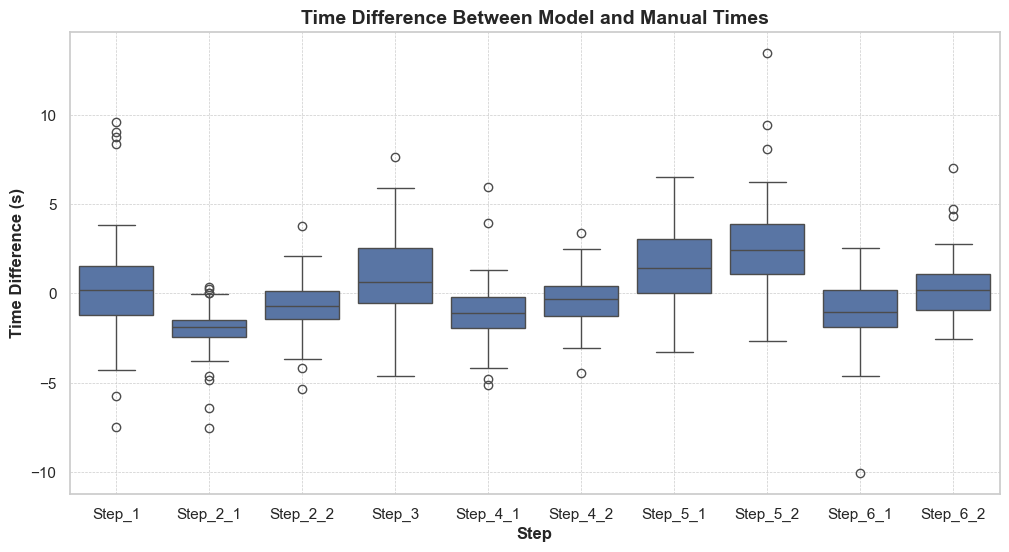

In [33]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=melted_df, x='Column', y='Value')

# Customize for academic publication
plt.title("Time Difference Between Model and Manual Times", fontsize=14, weight='bold')
plt.xlabel("Step", fontsize=12, weight='bold')
plt.ylabel("Time Difference (s)", fontsize=12, weight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the plot as an SVG file for publication
output_path = PATH + r'\Media\Manual_vs_Model_diff.svg'
plt.savefig(output_path, format='svg')

In [ ]:
#Grafico de tiempos
columns = ['id','Step_1', 'Step_2_1', 'Step_2_2', 'Step_3',
       'Step_4_1', 'Step_4_2', 'Step_5_1', 'Step_5_2', 'Step_6_1', 'Step_6_2']

merged_df = pd.merge(df[columns], df_manual[columns], on='id', suffixes=('#Model', '#Manual'), how='inner')
melted_df = merged_df.melt(id_vars=['id'], var_name='Column', value_name='Value')

# Split the 'Column' into 'Feature' and 'Source' for clearer plotting
melted_df[['Feature', 'Source']] = melted_df['Column'].str.split('#', expand=True)
melted_df = melted_df.drop(columns='Column')


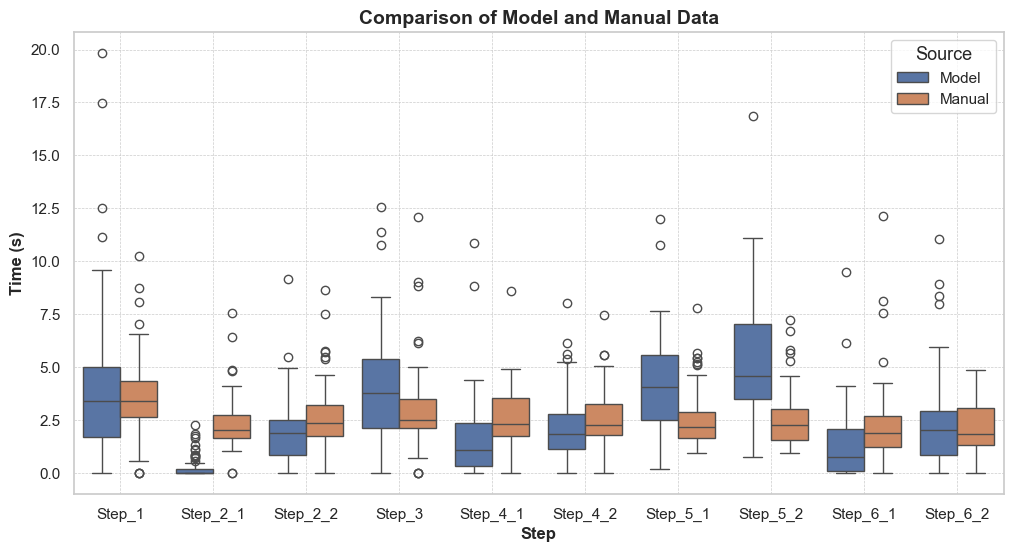

In [22]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=melted_df, x='Feature', y='Value', hue='Source')

# Customize for academic publication
plt.title("Comparison of Model and Manual Data", fontsize=14, weight='bold')
plt.xlabel("Step", fontsize=12, weight='bold')
plt.ylabel("Time (s)", fontsize=12, weight='bold')
plt.legend(title='Source', title_fontsize='13', fontsize='11')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the plot as an SVG file for publication
output_path = PATH + r'\Media\Manual_vs_Model.svg'
plt.savefig(output_path, format='svg')